In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading & Initial Inspection

In [2]:
df = pd.read_csv("campus_placement_data.csv")
campus_data = df.copy()
campus_data.head(2)

student_id  gender  ...  placed salary_lpa
0  STU000001    Male  ...       1      12.24
1  STU000002  Female  ...       1      10.09

[2 rows x 26 columns]

In [3]:
print(campus_data.shape)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(campus_data.info())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(campus_data.describe())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print(campus_data.isnull().sum())

(100000, 26)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   student_id                  100000 non-null  object 
 1   gender                      100000 non-null  object 
 2   age                         100000 non-null  int64  
 3   city_tier                   100000 non-null  object 
 4   ssc_percentage              100000 non-null  float64
 5   ssc_board                   100000 non-null  object 
 6   hsc_percentage              100000 non-null  float64
 7   hsc_board                   100000 non-null  object 
 8   hsc_stream                  100000 non-null  object 
 9   degree_percentage           100000 non-null  float64
 10  degree_field                100000 non-null  object 
 11  mba_percentage              100000 non-null  float64
 12  specializatio

### Exploratory Data Analysis (EDA)

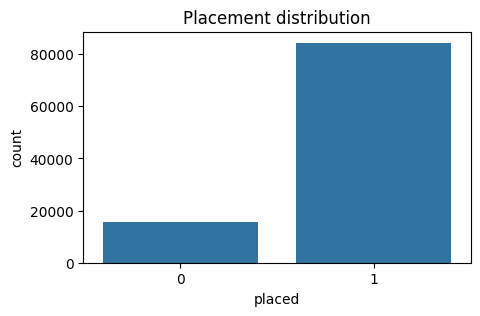

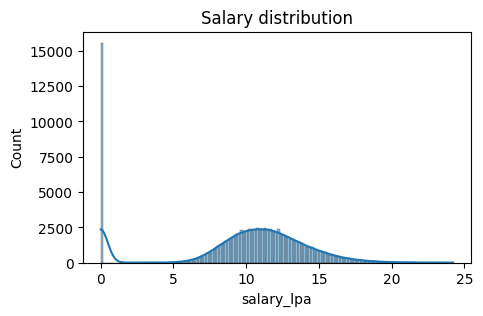

In [4]:
# # Placement distribution
plt.figure(figsize=(5,3))
sns.countplot(data=campus_data, x="placed")
plt.title("Placement distribution")
plt.show()

# Salary distribution
plt.figure(figsize=(5,3))
sns.histplot(campus_data["salary_lpa"], kde=True)
plt.title("Salary distribution")
plt.show()

##### Explore numerical feature distributions (histograms, KDE, boxplots) to detect patterns and outliers

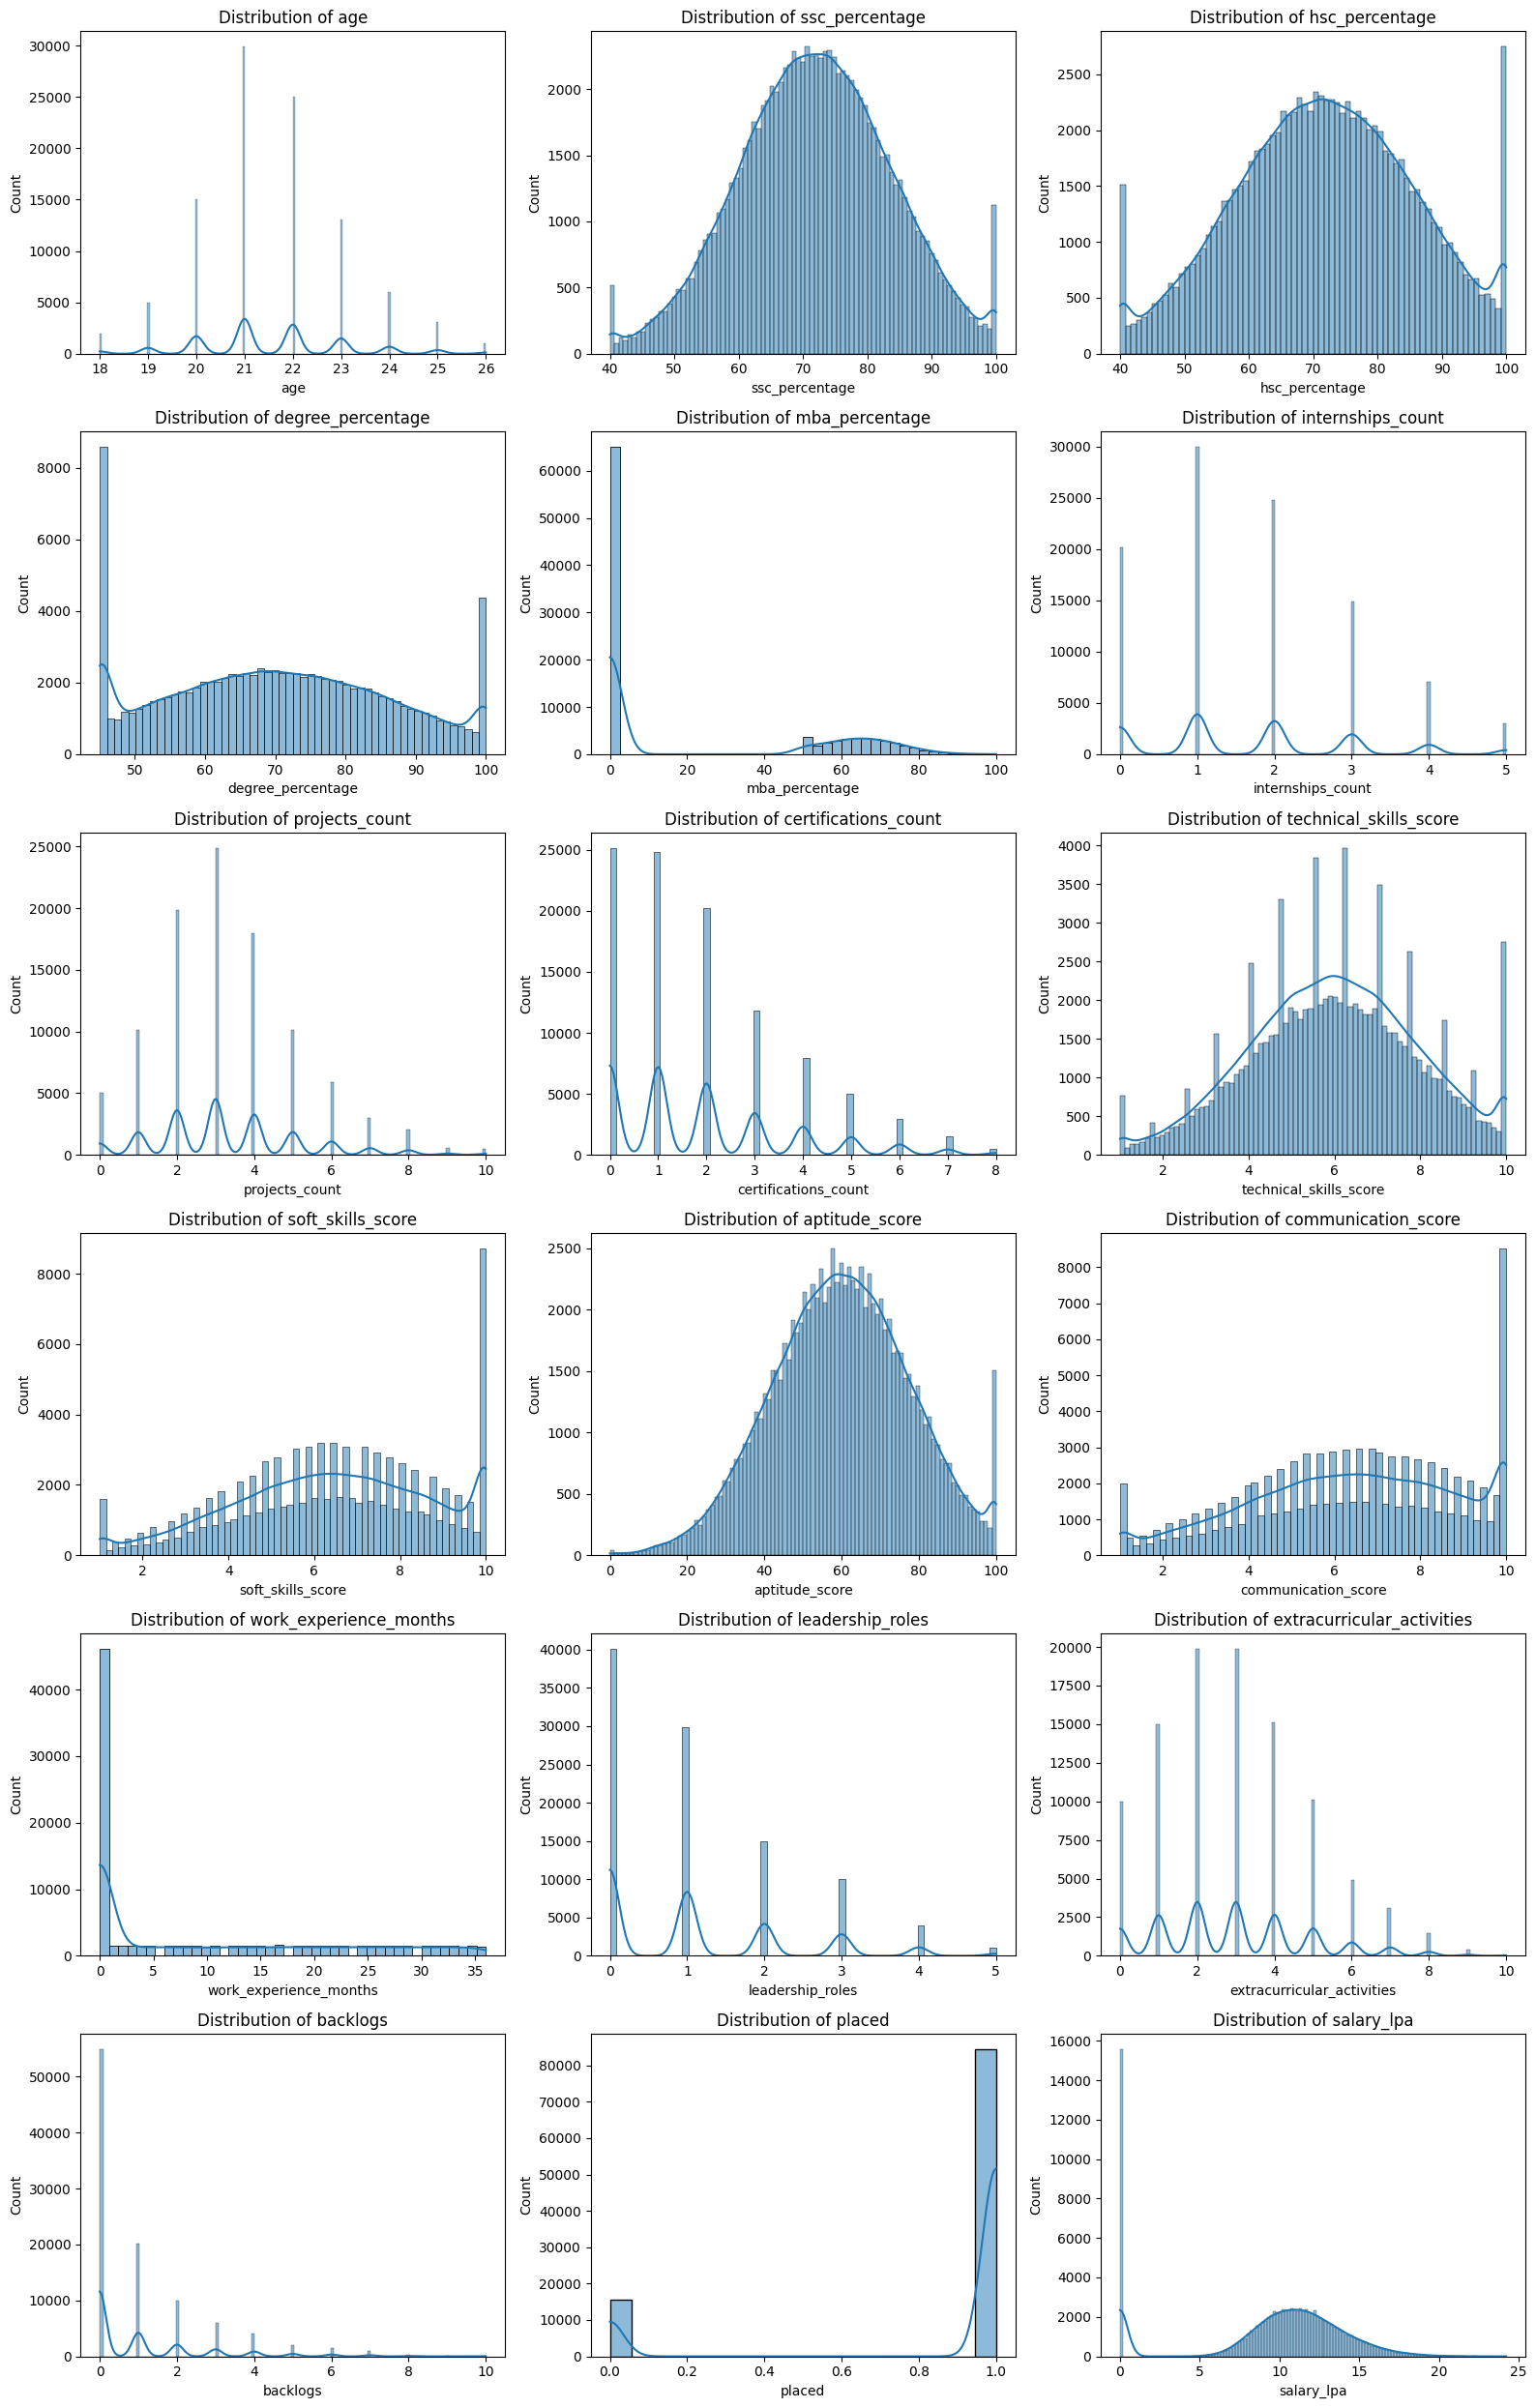

In [5]:
# Select numerical columns
numeric_cols = campus_data.select_dtypes(include=["int64" , "float64"]).columns

# Plot histograms with KDE
plt.figure(figsize=(16,25))
for i , col in enumerate(numeric_cols, 1):
    plt.subplot(6,3,i)
    sns.histplot(campus_data[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

##### Analyze relationships between features and target variables (placed and salary_lpa)

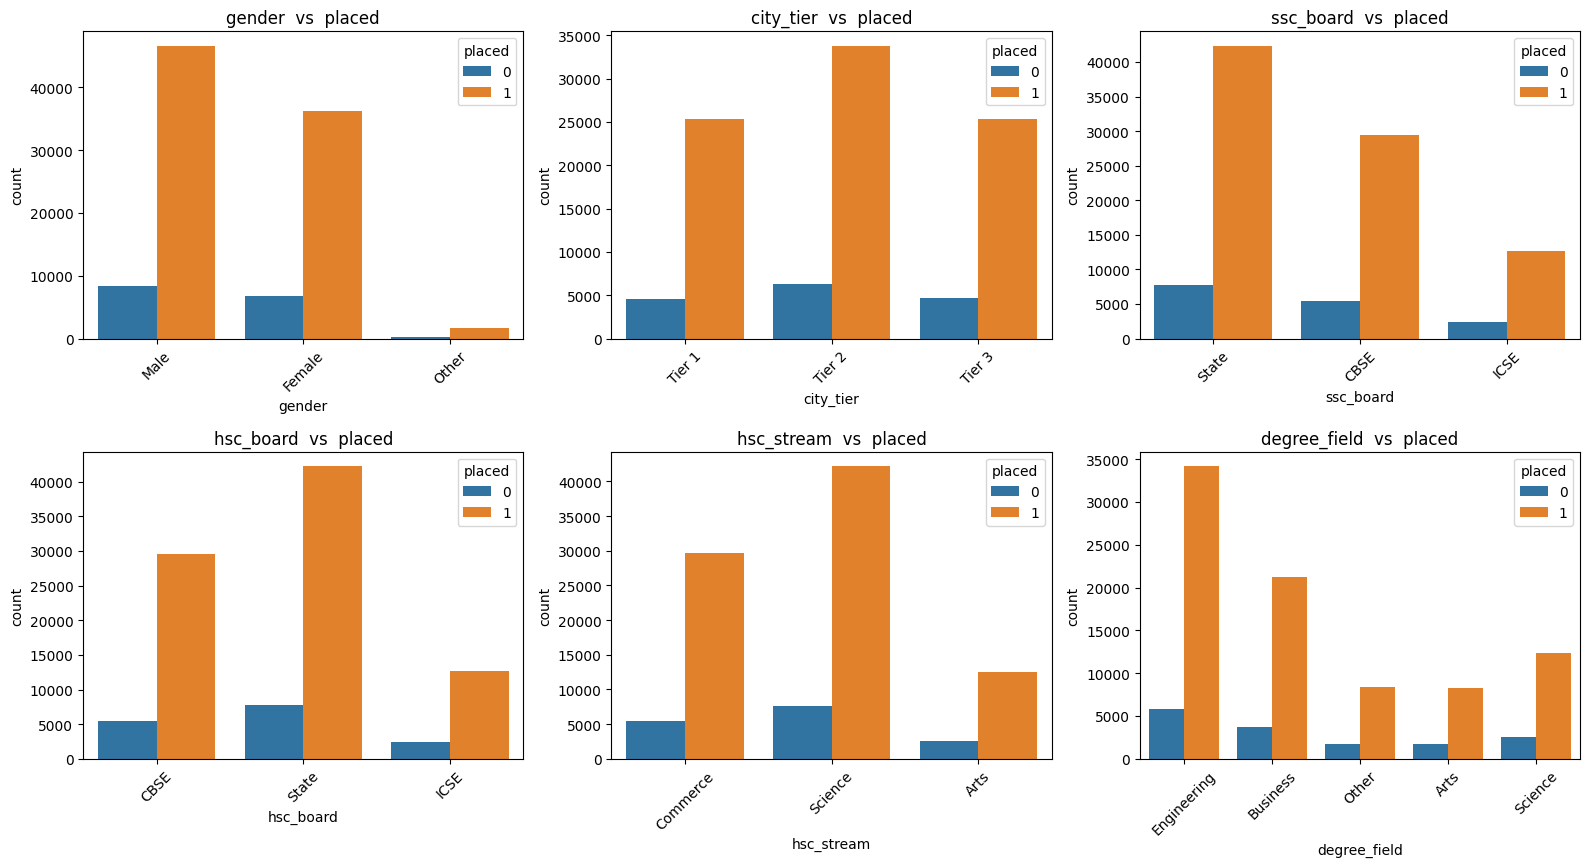

In [6]:
categorical_cols = ["gender" , "city_tier" , "ssc_board" , "hsc_board" , "hsc_stream" , "degree_field"]

plt.figure(figsize=(16,12))

for i , col in enumerate(categorical_cols, 1):
    plt.subplot(3,3,i)
    sns.countplot(data=campus_data, x=col, hue="placed")
    plt.title(f"{col}  vs  placed")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

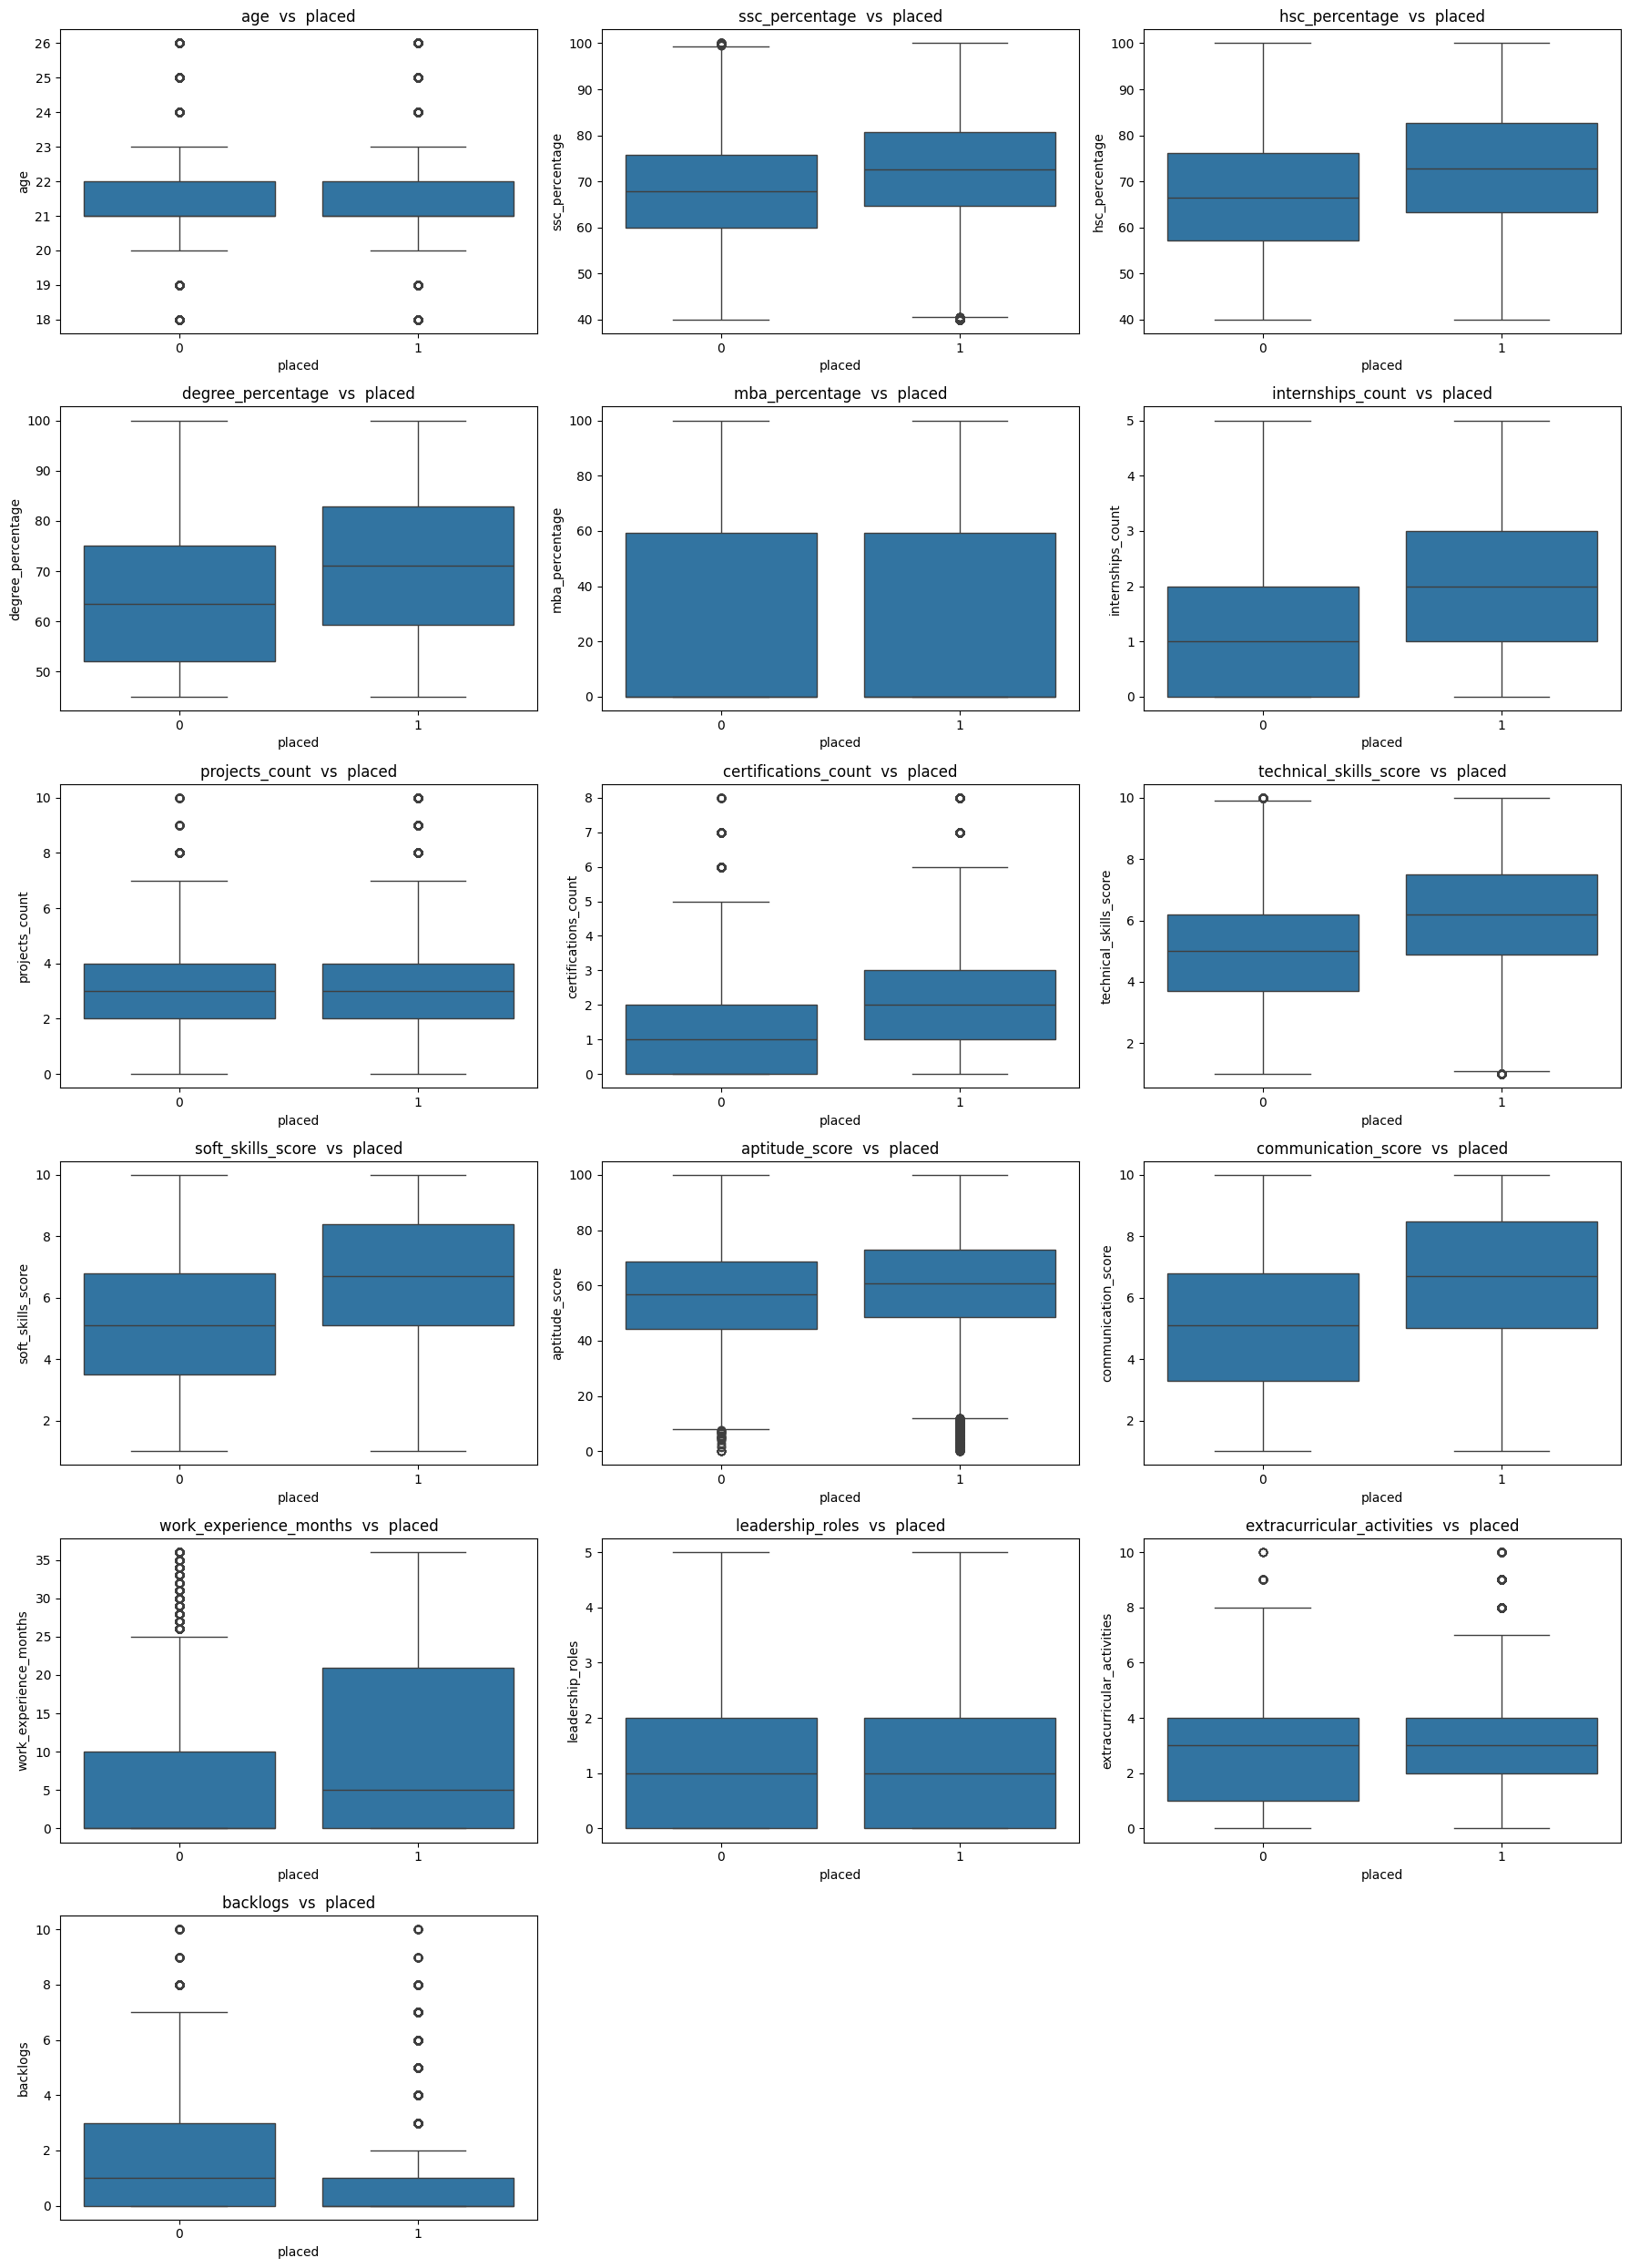

In [7]:
numeric_cols = [ "age", "ssc_percentage", "hsc_percentage", "degree_percentage", "mba_percentage", "internships_count",
                "projects_count", "certifications_count", "technical_skills_score", "soft_skills_score", "aptitude_score",
                "communication_score", "work_experience_months", "leadership_roles", "extracurricular_activities", "backlogs" ]

plt.figure(figsize=(18,25))

for i , col in enumerate(numeric_cols, 1):
    plt.subplot(6,3,i)
    sns.boxplot(data=campus_data, x="placed", y=col)
    plt.title(f"{col}  vs  placed")

plt.tight_layout()
plt.show()

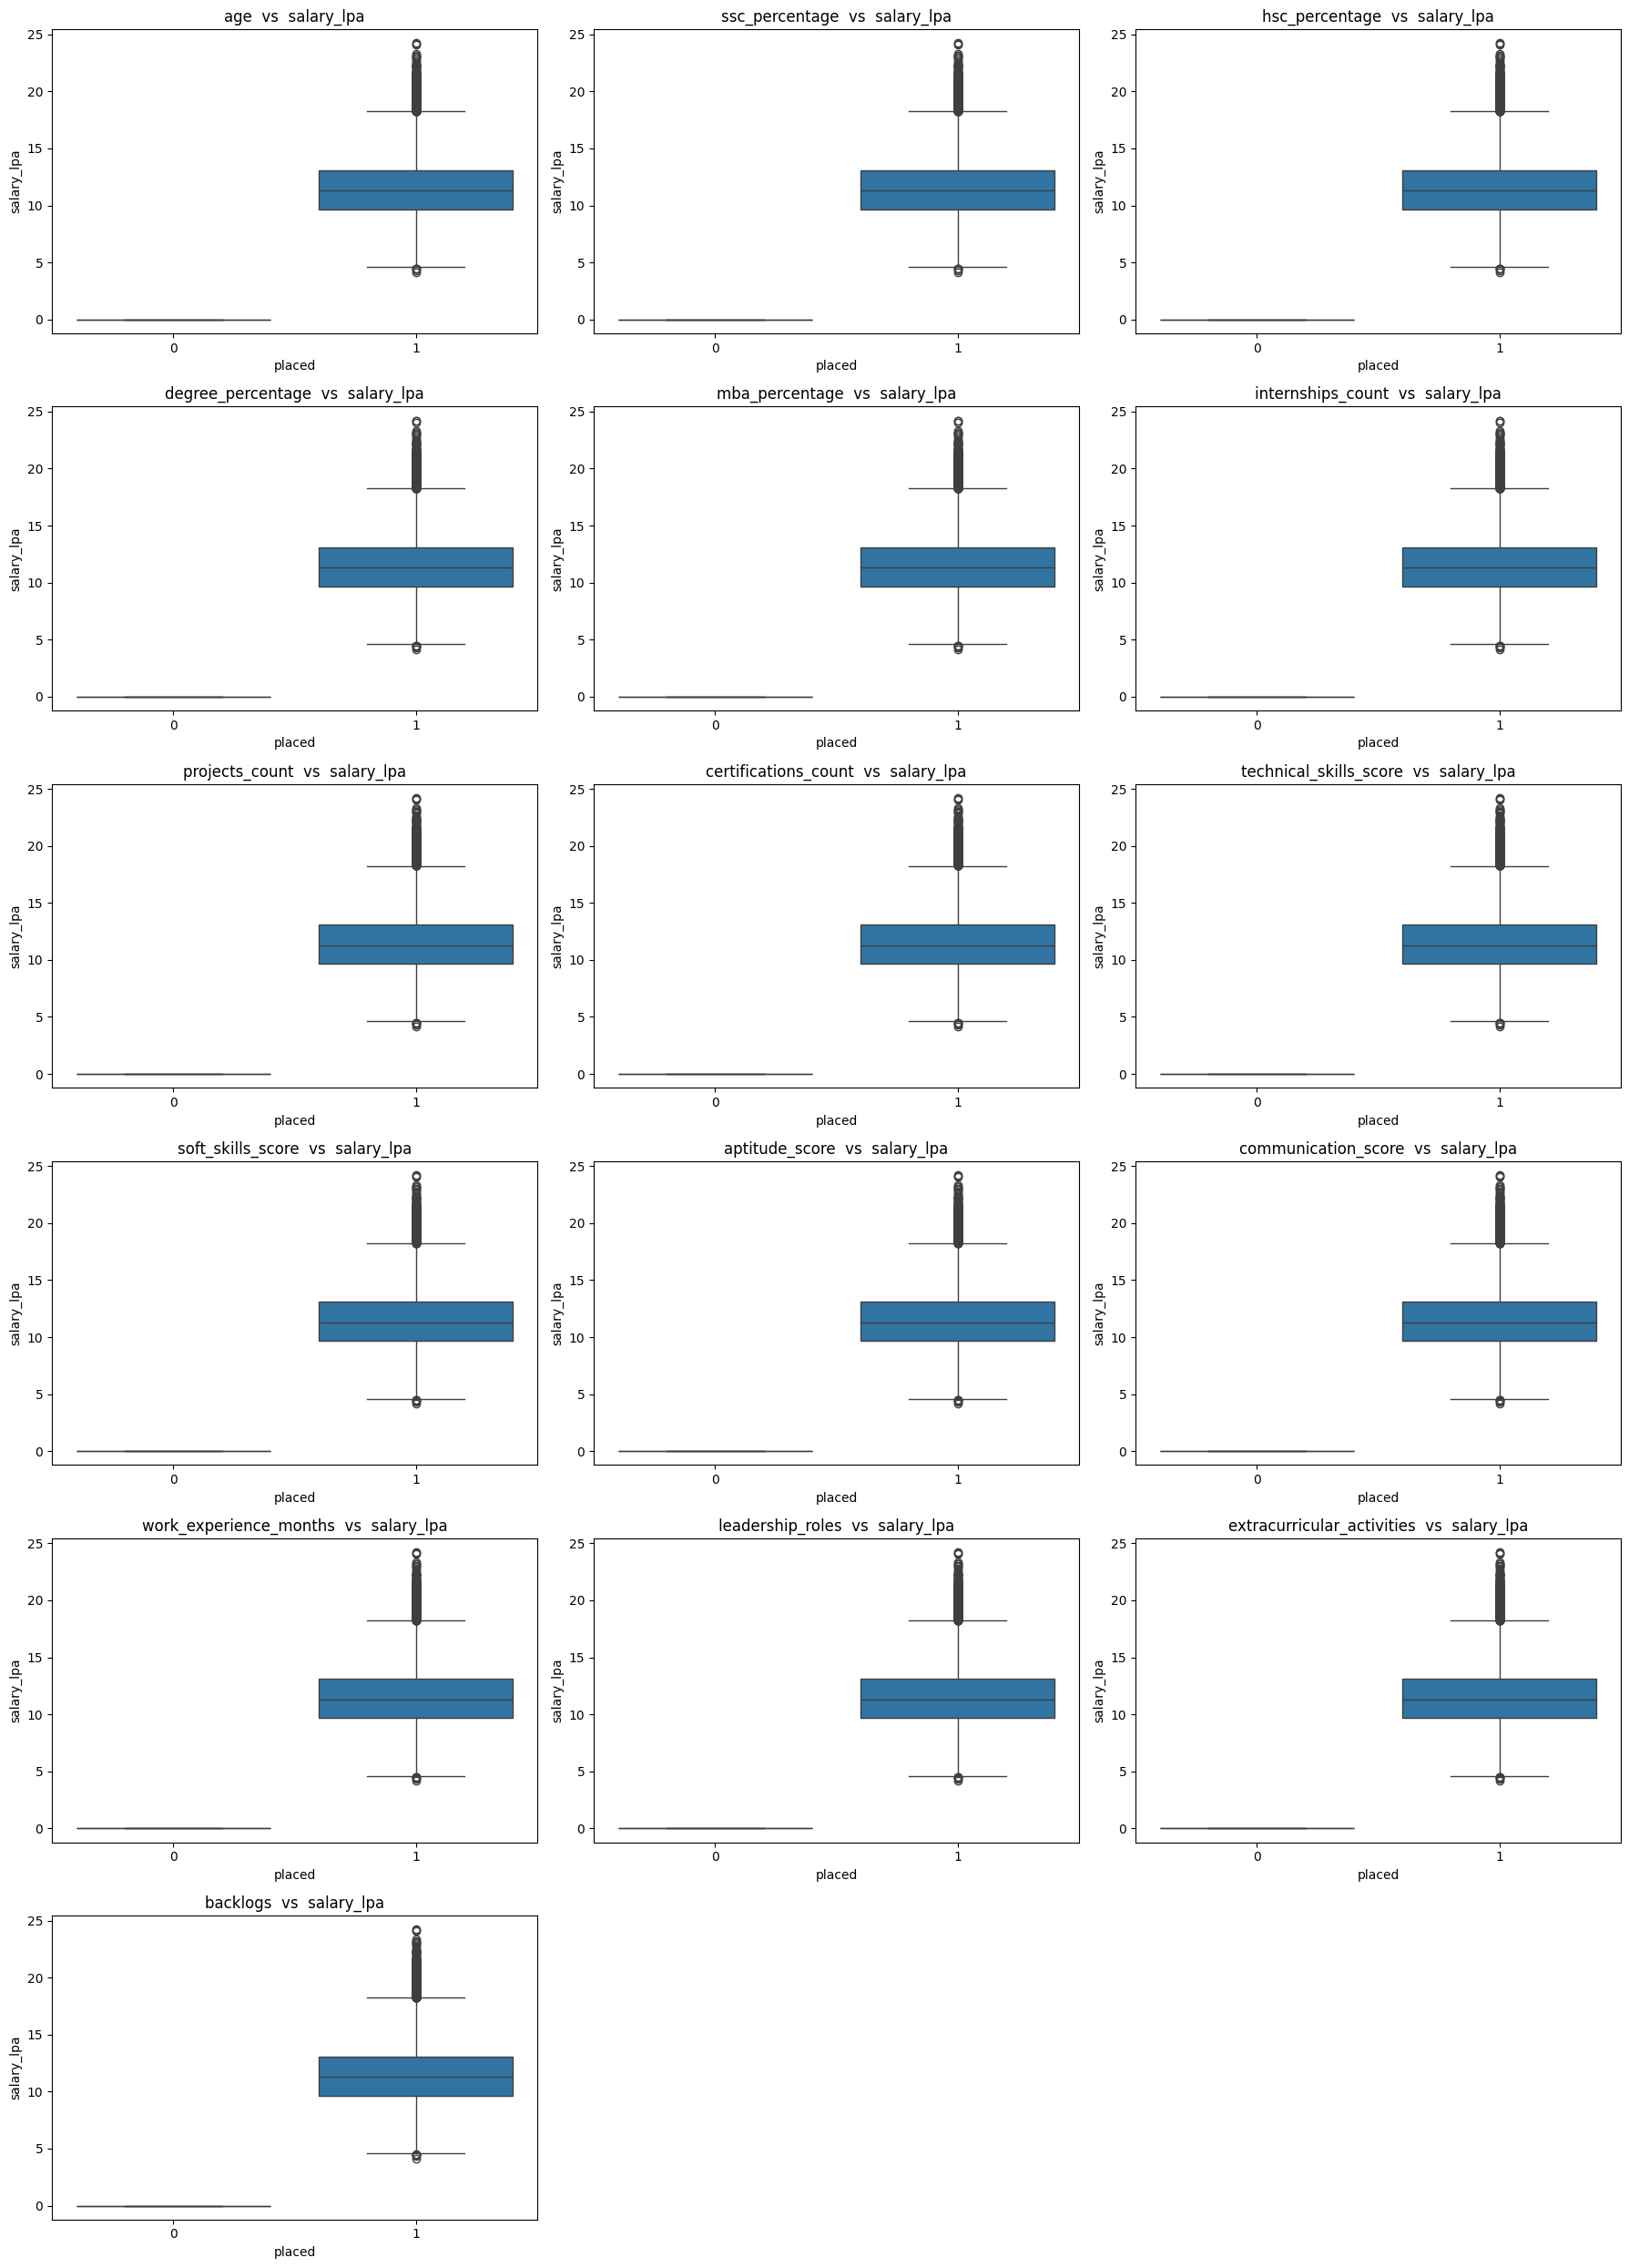

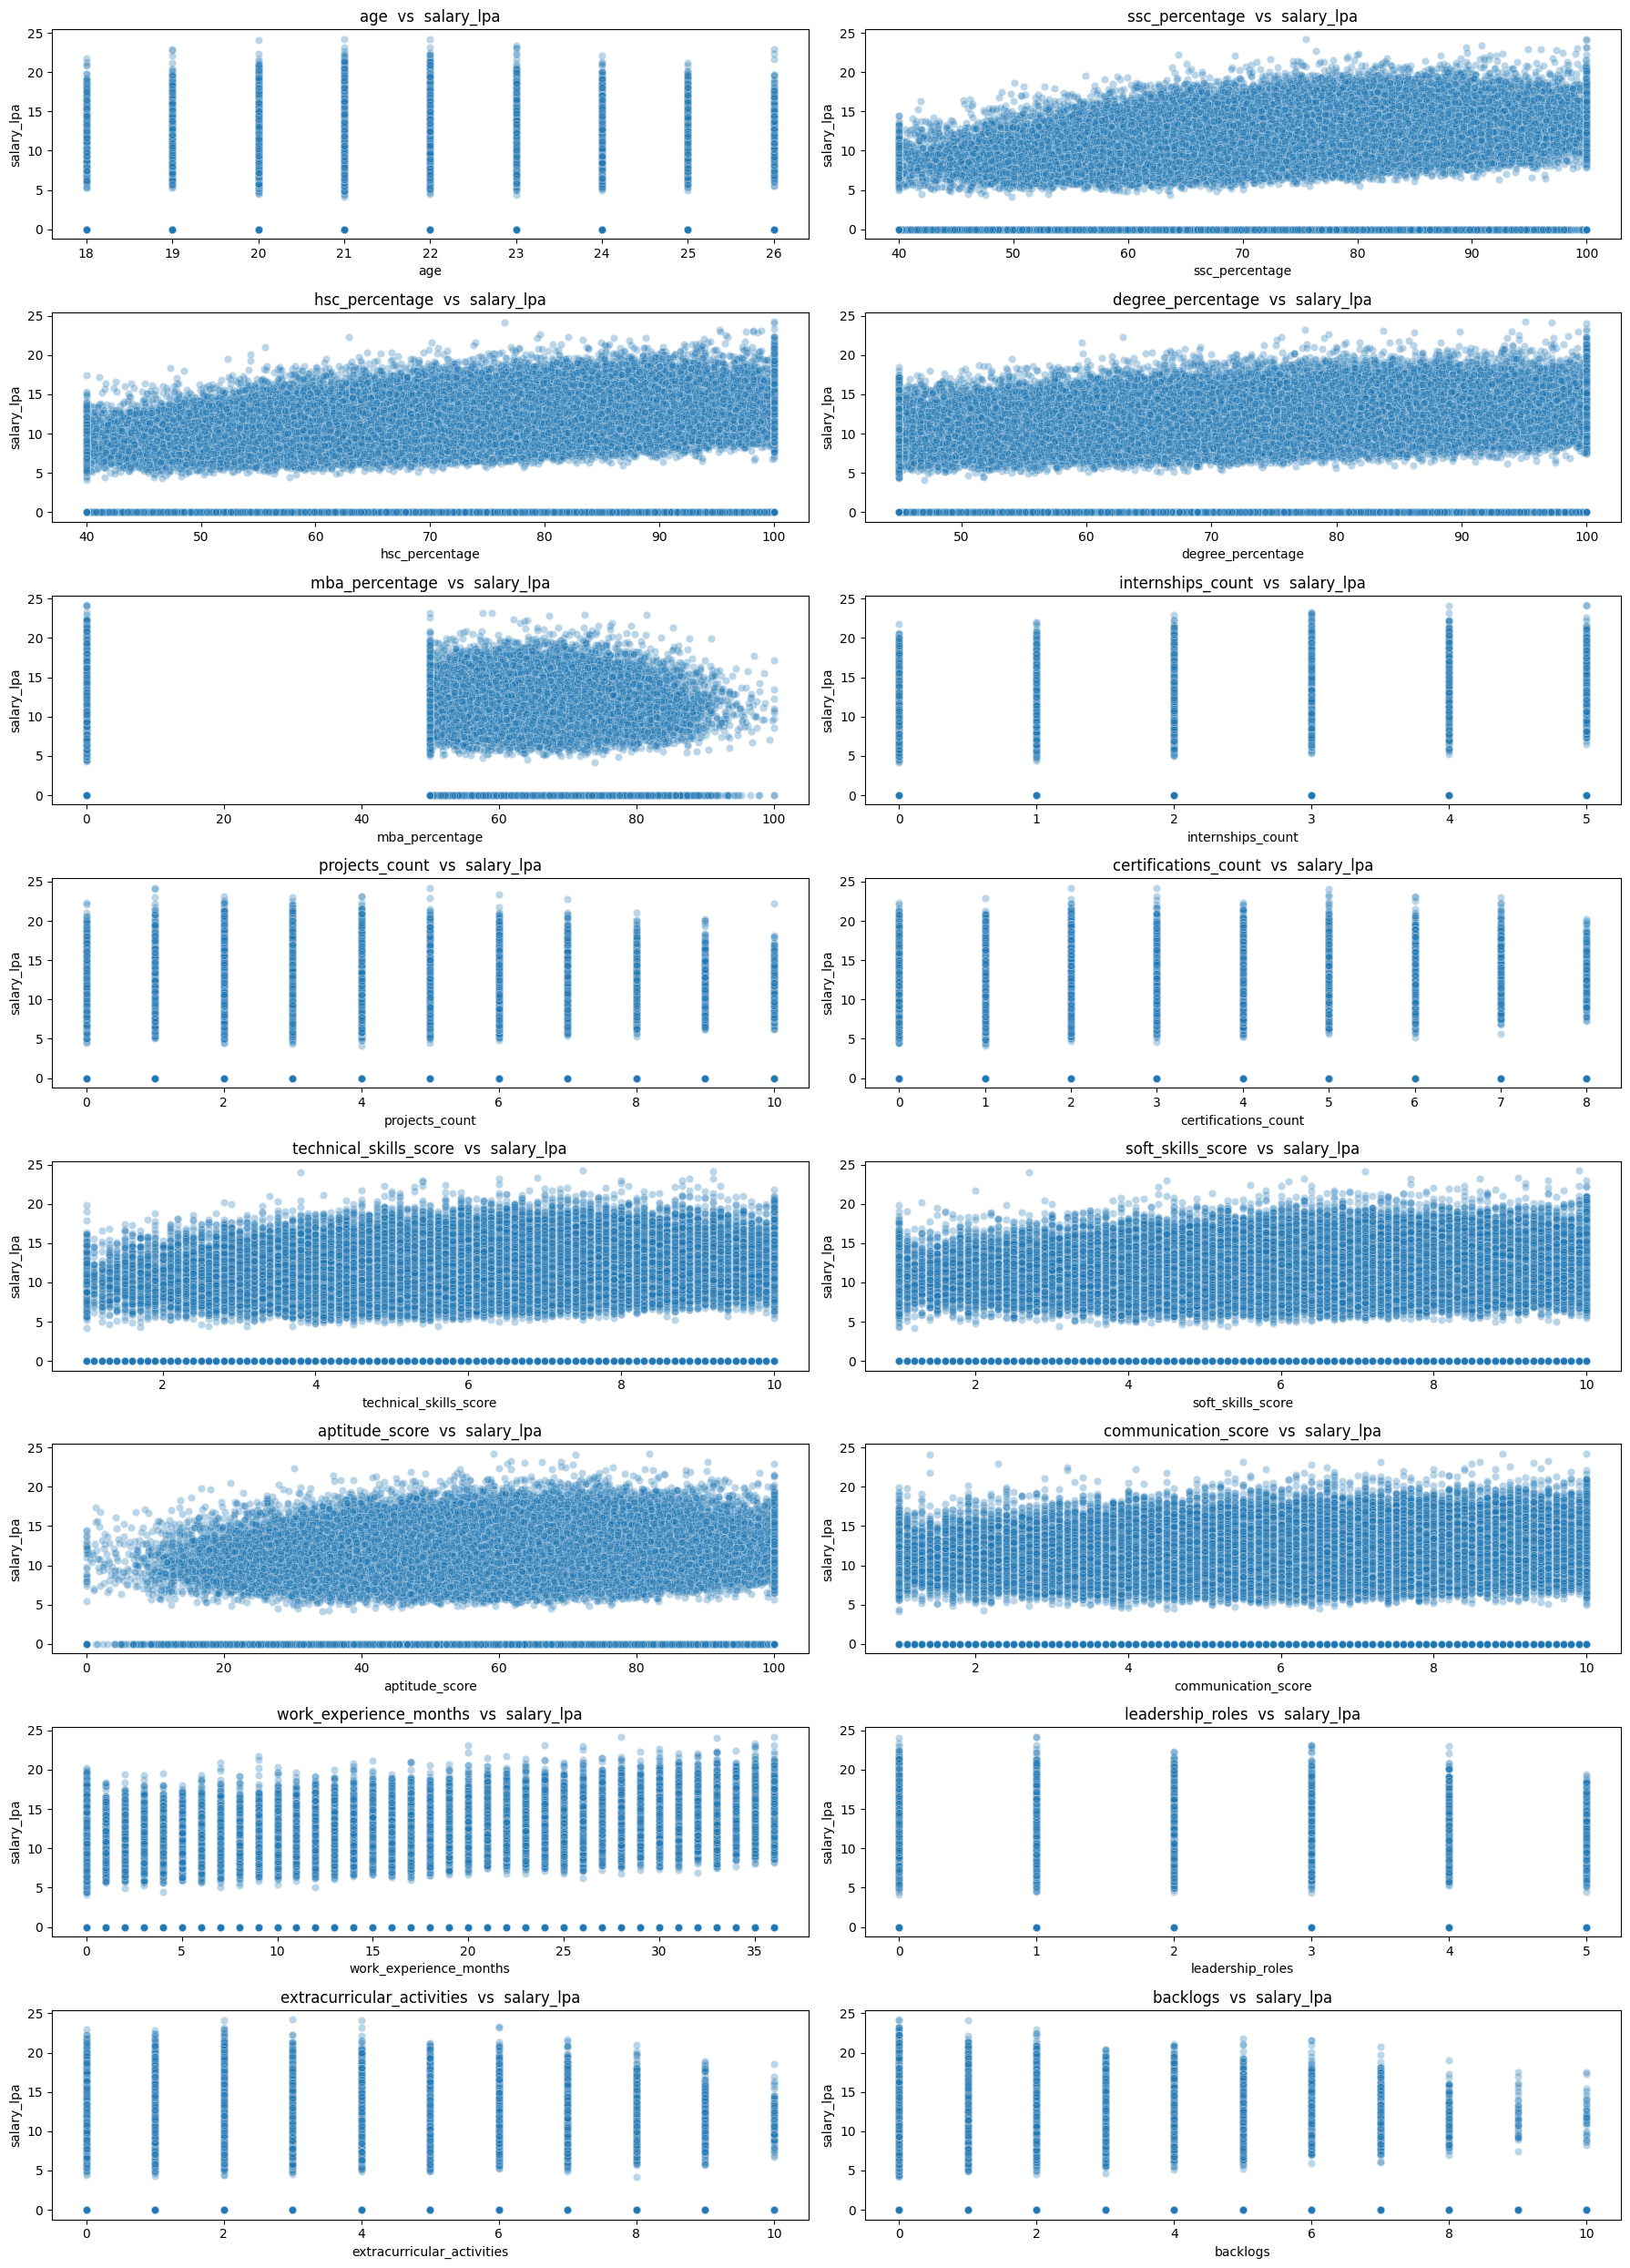

In [8]:
numeric_cols = ["age", "ssc_percentage", "hsc_percentage", "degree_percentage", "mba_percentage", "internships_count", "projects_count",
                "certifications_count", "technical_skills_score", "soft_skills_score", "aptitude_score", "communication_score", 
                "work_experience_months", "leadership_roles", "extracurricular_activities", "backlogs" ]

# BOX PLOTS
plt.figure(figsize=(18,25))
for i , col in enumerate(numeric_cols, 1):
    plt.subplot(6,3,i)
    sns.boxplot(data=campus_data, x="placed", y="salary_lpa")
    plt.title(f"{col}  vs  salary_lpa")

plt.tight_layout()
plt.show()

# SCATTER PLOTS
plt.figure(figsize=(18, 25))
for i , col in enumerate(numeric_cols, 1): 
    plt.subplot(8,2,i) 
    sns.scatterplot(data=campus_data, x=col, y="salary_lpa", alpha=0.3) 
    plt.title(f"{col}  vs  salary_lpa")

plt.tight_layout()
plt.show()

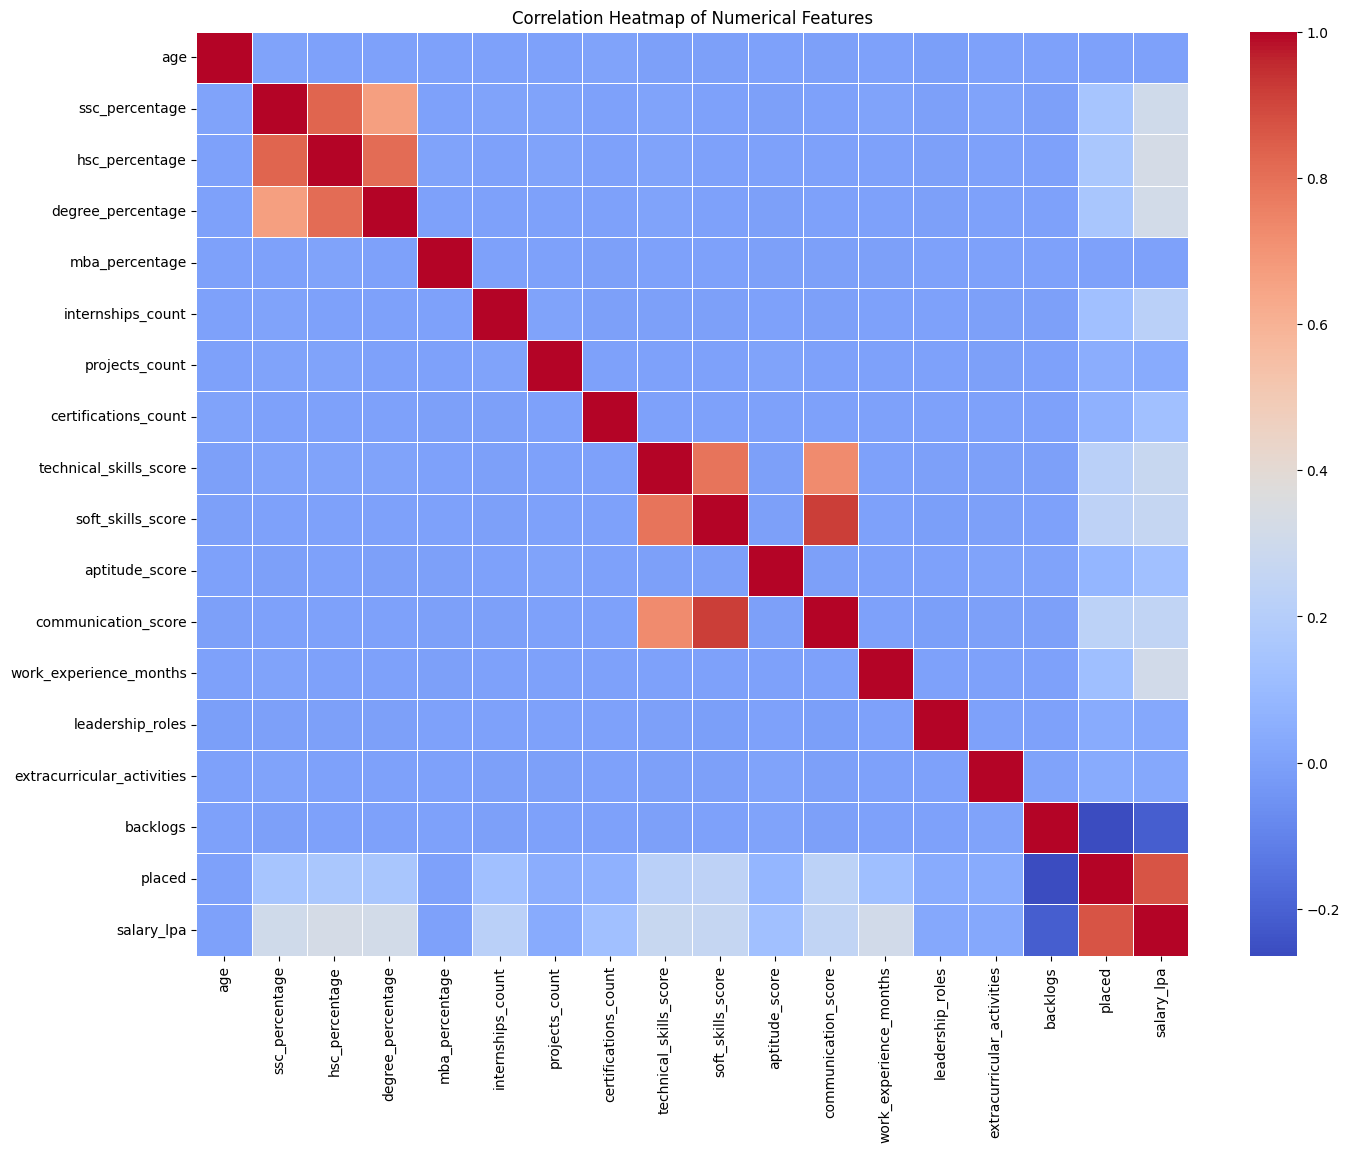

In [9]:
plt.figure(figsize=(16,12))

numeric_df = campus_data.select_dtypes(include=["int64" , "float64"])
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Data Preprocessing

In [10]:
# Drop useless columns
cols_to_drop = ["student_id", "ssc_board", "hsc_board", "age", "extracurricular_activities", "leadership_roles", "specialization"]
campus_data = campus_data.drop(columns=cols_to_drop)
campus_data.head(2)

gender city_tier  ...  placed  salary_lpa
0    Male    Tier 1  ...       1       12.24
1  Female    Tier 2  ...       1       10.09

[2 rows x 19 columns]

In [11]:
# Check missing values
campus_data.isnull().sum()

gender                    0
city_tier                 0
ssc_percentage            0
hsc_percentage            0
hsc_stream                0
degree_percentage         0
degree_field              0
mba_percentage            0
internships_count         0
projects_count            0
certifications_count      0
technical_skills_score    0
soft_skills_score         0
aptitude_score            0
communication_score       0
work_experience_months    0
backlogs                  0
placed                    0
salary_lpa                0
dtype: int64

In [12]:
# Encode categorical features using One-Hot Encoding
categorical_cols = ["gender", "city_tier", "hsc_stream", "degree_field"]
campus_data = pd.get_dummies(campus_data, columns=categorical_cols, drop_first=True)
campus_data.head(2)

ssc_percentage  ...  degree_field_Science
0           71.01  ...                 False
1           58.46  ...                 False

[2 rows x 25 columns]

In [13]:
# Prepare Classification Data
df_classification = campus_data.drop(columns=["salary_lpa"]).copy()

# Prepare Regression Data
df_regression = campus_data[campus_data["placed"] == 1].copy()
df_regression = df_regression.drop("placed", axis=1)

df_classification.shape, df_regression.shape

((100000, 24), (84432, 24))

### Data Spliting

In [14]:
# Train–Test Split (Classification)
X_clf = df_classification.drop("placed", axis=1)
Y_clf = df_classification["placed"]
x_train_clf , x_test_clf , y_train_clf , y_test_clf = train_test_split(X_clf, Y_clf, train_size=0.8, random_state=42)

# Train–Test Split (Regression)
X_reg = df_regression.drop("salary_lpa", axis=1)
Y_reg = df_regression["salary_lpa"]
x_train_reg , x_test_reg , y_train_reg , y_test_reg = train_test_split(X_reg, Y_reg, train_size=0.8, random_state=42)

# Clustering
x_cluster = campus_data.drop(columns=['placed', 'salary_lpa'])

In [15]:
x_train_clf.shape, x_test_clf.shape, x_train_reg.shape, x_test_reg.shape, x_cluster.shape

((80000, 23), (20000, 23), (67545, 23), (16887, 23), (100000, 23))

### Feature Scaling

In [16]:
# Feature Scaling
scaler = StandardScaler()

x_train_clf_scaled = scaler.fit_transform(x_train_clf)
x_test_clf_scaled = scaler.transform(x_test_clf)
x_train_reg_scaled = scaler.fit_transform(x_train_reg)
x_test_reg_scaled = scaler.transform(x_test_reg)
x_cluster_scaled = scaler.fit_transform(x_cluster)

### Model Training

#### Classification Models

In [17]:
# Logistic Regression

log_clf = LogisticRegression(max_iter=1500)
log_clf.fit(x_train_clf_scaled, y_train_clf)
y_pred_log = log_clf.predict(x_test_clf_scaled)

log_accuracy = accuracy_score(y_test_clf, y_pred_log)
log_report = classification_report(y_test_clf, y_pred_log)
log_cm = confusion_matrix(y_test_clf, y_pred_log)

print(log_accuracy)
print("~~~~~~~~~~~~~~~~~~~~")
print(log_report)
print("~~~~~~~~~~~~~~~~~~~~")
print(log_cm)

0.86
~~~~~~~~~~~~~~~~~~~~
              precision    recall  f1-score   support

           0       0.60      0.25      0.36      3068
           1       0.88      0.97      0.92     16932

    accuracy                           0.86     20000
   macro avg       0.74      0.61      0.64     20000
weighted avg       0.84      0.86      0.83     20000

~~~~~~~~~~~~~~~~~~~~
[[  773  2295]
 [  505 16427]]


In [18]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_depth=7, min_samples_split=2, min_samples_leaf=1, criterion="gini")
dt_clf.fit(x_train_clf, y_train_clf)
y_pred_dt = dt_clf.predict(x_test_clf)

dt_accuracy = accuracy_score(y_test_clf, y_pred_dt)
dt_report = classification_report(y_test_clf, y_pred_dt)
dt_cm = confusion_matrix(y_test_clf, y_pred_dt)

print(dt_accuracy)
print("~~~~~~~~~~~~~~~~~~~~")
print(dt_report)
print("~~~~~~~~~~~~~~~~~~~~")
print(dt_cm)

0.85355
~~~~~~~~~~~~~~~~~~~~
              precision    recall  f1-score   support

           0       0.59      0.15      0.24      3068
           1       0.86      0.98      0.92     16932

    accuracy                           0.85     20000
   macro avg       0.73      0.57      0.58     20000
weighted avg       0.82      0.85      0.82     20000

~~~~~~~~~~~~~~~~~~~~
[[  467  2601]
 [  328 16604]]


In [19]:
# Random Forest Classifier

rf_clf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", random_state=42)
rf_clf.fit(x_train_clf, y_train_clf)
y_pred_rf = rf_clf.predict(x_test_clf)

rf_accuracy = accuracy_score(y_test_clf, y_pred_rf)
rf_report = classification_report(y_test_clf, y_pred_rf)
rf_cm = confusion_matrix(y_test_clf, y_pred_rf)

print(rf_accuracy)
print("~~~~~~~~~~~~~~~~~~~~")
print(rf_report)
print("~~~~~~~~~~~~~~~~~~~~")
print(rf_cm)

0.8565
~~~~~~~~~~~~~~~~~~~~
              precision    recall  f1-score   support

           0       0.61      0.18      0.28      3068
           1       0.87      0.98      0.92     16932

    accuracy                           0.86     20000
   macro avg       0.74      0.58      0.60     20000
weighted avg       0.83      0.86      0.82     20000

~~~~~~~~~~~~~~~~~~~~
[[  558  2510]
 [  360 16572]]


In [20]:
# KNN Classifier

knn_clf = KNeighborsClassifier(n_neighbors=10, metric="minkowski", weights="distance")
knn_clf.fit(x_train_clf_scaled, y_train_clf)
y_pred_knn = knn_clf.predict(x_test_clf_scaled)

knn_accuracy = accuracy_score(y_test_clf, y_pred_knn)
knn_report = classification_report(y_test_clf, y_pred_knn)
knn_cm = confusion_matrix(y_test_clf, y_pred_knn)

print(knn_accuracy)
print("~~~~~~~~~~~~~~~~~~~~")
print(knn_report)
print("~~~~~~~~~~~~~~~~~~~~")
print(knn_cm)

0.8496
~~~~~~~~~~~~~~~~~~~~
              precision    recall  f1-score   support

           0       0.53      0.16      0.25      3068
           1       0.87      0.97      0.92     16932

    accuracy                           0.85     20000
   macro avg       0.70      0.57      0.58     20000
weighted avg       0.81      0.85      0.81     20000

~~~~~~~~~~~~~~~~~~~~
[[  496  2572]
 [  436 16496]]


In [21]:
# MLP Classifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation="relu", solver="adam", max_iter=500, verbose=True, random_state=42)
mlp_clf.fit(x_train_clf_scaled, y_train_clf)
y_pred_mlp = mlp_clf.predict(x_test_clf_scaled)

mlp_accuracy = accuracy_score(y_test_clf, y_pred_mlp)
mlp_report = classification_report(y_test_clf, y_pred_mlp)
mlp_cm = confusion_matrix(y_test_clf, y_pred_mlp)

print(mlp_accuracy)
print("~~~~~~~~~~~~~~~~~~~~")
print(mlp_report)
print("~~~~~~~~~~~~~~~~~~~~")
print(mlp_cm)

Iteration 1, loss = 0.34401830
Iteration 2, loss = 0.32823414
Iteration 3, loss = 0.32596024
Iteration 4, loss = 0.32428094
Iteration 5, loss = 0.32269139
Iteration 6, loss = 0.32128448
Iteration 7, loss = 0.31969598
Iteration 8, loss = 0.31830026
Iteration 9, loss = 0.31717031
Iteration 10, loss = 0.31532752
Iteration 11, loss = 0.31401259
Iteration 12, loss = 0.31223633
Iteration 13, loss = 0.31065373
Iteration 14, loss = 0.30950935
Iteration 15, loss = 0.30753716
Iteration 16, loss = 0.30587487
Iteration 17, loss = 0.30420451
Iteration 18, loss = 0.30245912
Iteration 19, loss = 0.30080023
Iteration 20, loss = 0.29885219
Iteration 21, loss = 0.29714345
Iteration 22, loss = 0.29524234
Iteration 23, loss = 0.29288748
Iteration 24, loss = 0.29157786
Iteration 25, loss = 0.28990351
Iteration 26, loss = 0.28783351
Iteration 27, loss = 0.28556257
Iteration 28, loss = 0.28387449
Iteration 29, loss = 0.28223981
Iteration 30, loss = 0.28033537
Iteration 31, loss = 0.27802694
Iteration 32, los

#### Regression Models

In [22]:
# Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(x_train_reg_scaled, y_train_reg)
y_pred_lin = lin_reg.predict(x_test_reg_scaled)

lin_mae = mean_absolute_error(y_test_reg, y_pred_lin)
lin_mse = mean_squared_error(y_test_reg, y_pred_lin)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(y_test_reg, y_pred_lin)

print(lin_mae)
print("~~~~~~~~~~~~~~~~~~~~")
print(lin_mse)
print("~~~~~~~~~~~~~~~~~~~~")
print(lin_rmse)
print("~~~~~~~~~~~~~~~~~~~~")
print(lin_r2)

0.8860326717138746
~~~~~~~~~~~~~~~~~~~~
1.0960022413789454
~~~~~~~~~~~~~~~~~~~~
1.0469012567472376
~~~~~~~~~~~~~~~~~~~~
0.8284564153794348


In [23]:
# Decision Tree Regressor

dt_reg = DecisionTreeRegressor(max_depth=11, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt_reg.fit(x_train_reg, y_train_reg)
y_pred_dtr = dt_reg.predict(x_test_reg)

dt_mae = mean_absolute_error(y_test_reg, y_pred_dtr)
dt_mse = mean_squared_error(y_test_reg, y_pred_dtr)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test_reg, y_pred_dtr)

print(dt_mae)
print("~~~~~~~~~~~~~~~~~~~~")
print(dt_mse)
print("~~~~~~~~~~~~~~~~~~~~")
print(dt_rmse)
print("~~~~~~~~~~~~~~~~~~~~")
print(dt_r2)

1.1407570388529304
~~~~~~~~~~~~~~~~~~~~
2.0312511372706363
~~~~~~~~~~~~~~~~~~~~
1.4252196803547994
~~~~~~~~~~~~~~~~~~~~
0.6820735504029614


In [24]:
# Random Forest Regressor

rf_reg = RandomForestRegressor(n_estimators=200, max_depth=25, min_samples_split=2, min_samples_leaf=1, random_state=42, n_jobs=-1)
rf_reg.fit(x_train_reg, y_train_reg)
y_pred_rfr = rf_reg.predict(x_test_reg)

rf_mae = mean_absolute_error(y_test_reg, y_pred_rfr)
rf_mse = mean_squared_error(y_test_reg, y_pred_rfr)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test_reg, y_pred_rfr)

print(rf_mae)
print("~~~~~~~~~~~~~~~~~~~~")
print(rf_mse)
print("~~~~~~~~~~~~~~~~~~~~")
print(rf_rmse)
print("~~~~~~~~~~~~~~~~~~~~")
print(rf_r2)

0.9383875481895853
~~~~~~~~~~~~~~~~~~~~
1.286749429513583
~~~~~~~~~~~~~~~~~~~~
1.1343497827009017
~~~~~~~~~~~~~~~~~~~~
0.7986011329963074


In [25]:
# KNN Regressor

knn_reg = KNeighborsRegressor(n_neighbors=20, metric="minkowski", weights="distance")
knn_reg.fit(x_train_reg_scaled, y_train_reg)
y_pred_knnr = knn_reg.predict(x_test_reg_scaled)

knn_mae = mean_absolute_error(y_test_reg, y_pred_knnr)
knn_mse = mean_squared_error(y_test_reg, y_pred_knnr)
knn_rmse = np.sqrt(knn_mse)
knn_r2 = r2_score(y_test_reg, y_pred_knnr)

print(knn_mae)
print("~~~~~~~~~~~~~~~~~~~~")
print(knn_mse)
print("~~~~~~~~~~~~~~~~~~~~")
print(knn_rmse)
print("~~~~~~~~~~~~~~~~~~~~")
print(knn_r2)

1.0247884156301286
~~~~~~~~~~~~~~~~~~~~
1.6149965000584456
~~~~~~~~~~~~~~~~~~~~
1.2708251256795506
~~~~~~~~~~~~~~~~~~~~
0.7472247060178188


In [26]:
# MLP Regressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(64, 32), activation="relu", solver="adam", max_iter=200, 
                       learning_rate='adaptive', verbose=True, random_state=42)
mlp_reg.fit(x_train_reg_scaled, y_train_reg)
y_pred_mlpr = mlp_reg.predict(x_test_reg_scaled)

mlp_mae = mean_absolute_error(y_test_reg, y_pred_mlpr)
mlp_mse = mean_squared_error(y_test_reg, y_pred_mlpr)
mlp_rmse = np.sqrt(mlp_mse)
mlp_r2 = r2_score(y_test_reg, y_pred_mlpr)

print(mlp_mae)
print("~~~~~~~~~~~~~~~~~~~~")
print(mlp_mse)
print("~~~~~~~~~~~~~~~~~~~~")
print(mlp_rmse)
print("~~~~~~~~~~~~~~~~~~~~")
print(mlp_r2)

Iteration 1, loss = 10.36864131
Iteration 2, loss = 0.82392188
Iteration 3, loss = 0.66109319
Iteration 4, loss = 0.60476915
Iteration 5, loss = 0.57779705
Iteration 6, loss = 0.56306379
Iteration 7, loss = 0.55190057
Iteration 8, loss = 0.54287334
Iteration 9, loss = 0.53835074
Iteration 10, loss = 0.53438387
Iteration 11, loss = 0.53199259
Iteration 12, loss = 0.53092148
Iteration 13, loss = 0.52822660
Iteration 14, loss = 0.52825899
Iteration 15, loss = 0.52559034
Iteration 16, loss = 0.52487637
Iteration 17, loss = 0.52459527
Iteration 18, loss = 0.52353569
Iteration 19, loss = 0.52131138
Iteration 20, loss = 0.52189272
Iteration 21, loss = 0.52152751
Iteration 22, loss = 0.52063606
Iteration 23, loss = 0.52030235
Iteration 24, loss = 0.51971346
Iteration 25, loss = 0.52023276
Iteration 26, loss = 0.51904384
Iteration 27, loss = 0.51919535
Iteration 28, loss = 0.51956434
Iteration 29, loss = 0.51936311
Iteration 30, loss = 0.51759056
Iteration 31, loss = 0.51751172
Iteration 32, lo

#### Clustering Models

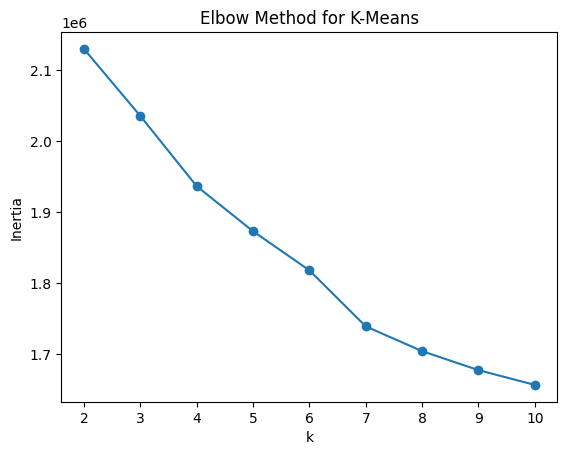

In [27]:
# Elbow Method

inertias = []

for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_cluster_scaled)
    inertias.append(km.inertia_)

plt.plot(range(2, 11), inertias, marker='o') 
plt.xlabel("k") 
plt.ylabel("Inertia") 
plt.title("Elbow Method for K-Means") 
plt.show()

In [28]:
# K‑Means

kmeans = KMeans(n_clusters=6, random_state=42)
clusters_k6 = kmeans.fit_predict(x_cluster_scaled)
campus_data['cluster_kmeans'] = clusters_k6

sil_k6 = silhouette_score(x_cluster_scaled, clusters_k6)
sil_k6

0.06707120224290428

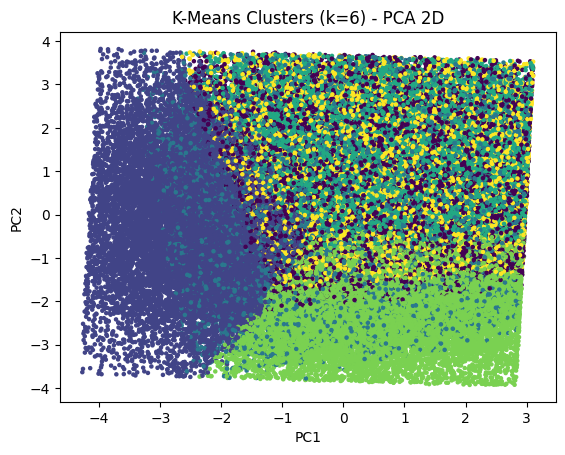

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_cluster_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_k6, cmap='viridis', s=5)
plt.title("K-Means Clusters (k=6) - PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

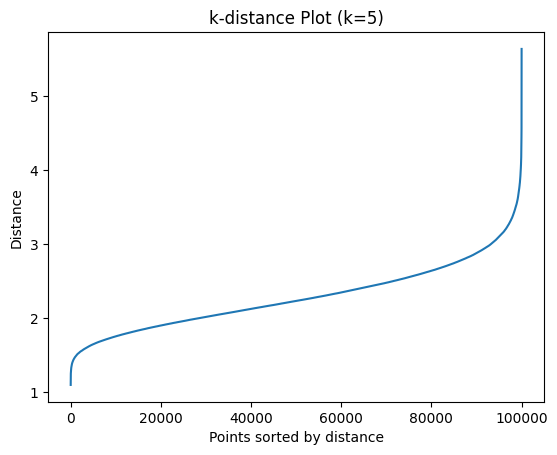

In [32]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(x_cluster_scaled)
distances, indices = neighbors_fit.kneighbors(x_cluster_scaled)

distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title("k-distance Plot (k=5)")
plt.ylabel("Distance")
plt.xlabel("Points sorted by distance")
plt.show()

In [47]:
# DBSCAN

dbscan = DBSCAN(eps=3.5, min_samples=5)
clusters_db = dbscan.fit_predict(x_cluster_scaled)

campus_data['cluster_dbscan'] = clusters_db

sil_dbscan = silhouette_score(x_cluster_scaled, clusters_db)

In [34]:
np.unique(clusters_db, return_counts=True)

(array([-1,  0,  1,  2]), array([  351, 97899,  1615,   135]))

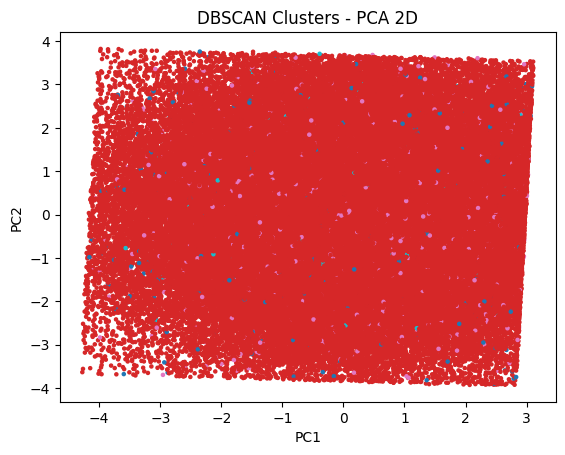

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_cluster_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_db, cmap='tab10', s=5)
plt.title("DBSCAN Clusters - PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

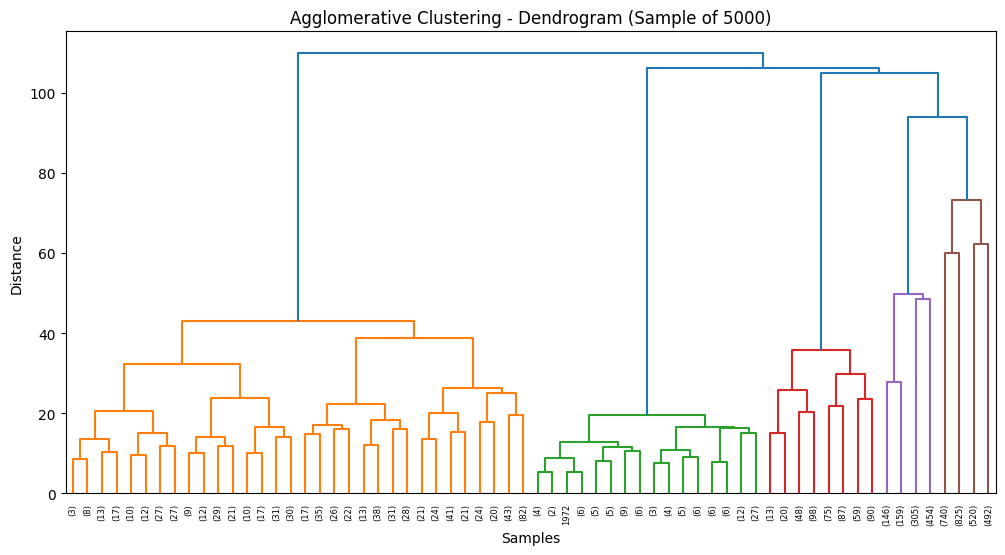

In [37]:
sample_idx = np.random.choice(len(x_cluster_scaled), 5000, replace=False)
X_sample = x_cluster_scaled[sample_idx]

linked = linkage(X_sample, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Agglomerative Clustering - Dendrogram (Sample of 5000)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [48]:
# Agglomerative

# Sample 5000 points
sample_idx = np.random.choice(len(x_cluster_scaled), 5000, replace=False)
X_sample = x_cluster_scaled[sample_idx]

agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_agg_sample = agg.fit_predict(X_sample)

# Save cluster labels back to main dataframe (only for sampled rows)
campus_data.loc[sample_idx, 'cluster_agg'] = clusters_agg_sample

sil_agg = silhouette_score(X_sample, clusters_agg_sample)

print(np.unique(clusters_agg_sample, return_counts=True))

(array([0, 1, 2]), array([1167, 2427, 1406]))


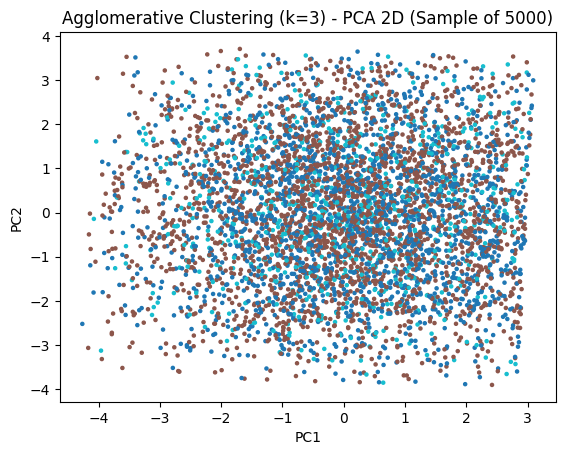

In [43]:
X_pca_sample = X_pca[sample_idx]

plt.scatter(X_pca_sample[:,0], X_pca_sample[:,1],
            c=clusters_agg_sample, cmap='tab10', s=5)
plt.title("Agglomerative Clustering (k=3) - PCA 2D (Sample of 5000)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### Comparing models with a chart

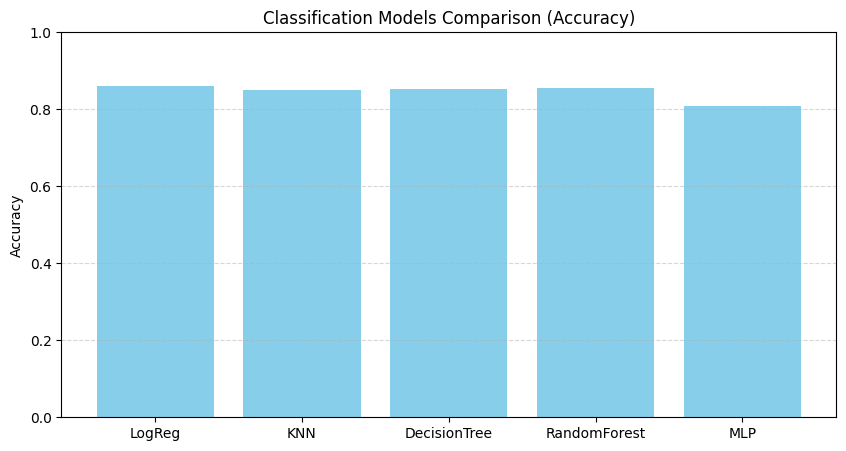

In [44]:
# Classification

classification_models = ['LogReg', 'KNN', 'DecisionTree', 'RandomForest', 'MLP']
classification_scores = [log_accuracy, knn_accuracy, dt_accuracy, rf_accuracy, mlp_accuracy]

plt.figure(figsize=(10,5))
plt.bar(classification_models, classification_scores, color='skyblue')
plt.title("Classification Models Comparison (Accuracy)")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

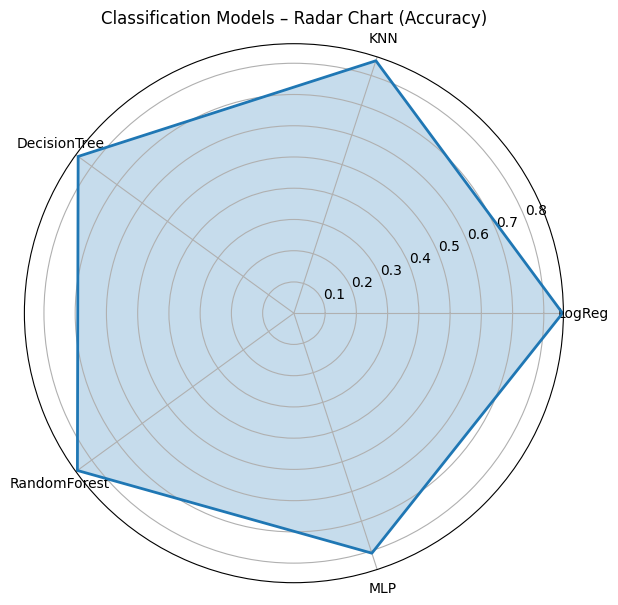

In [49]:
labels = ['LogReg', 'KNN', 'DecisionTree', 'RandomForest', 'MLP']
scores = [log_accuracy, knn_accuracy, dt_accuracy, rf_accuracy, mlp_accuracy]

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
scores += scores[:1]
angles += angles[:1]

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)
ax.plot(angles, scores, linewidth=2)
ax.fill(angles, scores, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title("Classification Models – Radar Chart (Accuracy)")
plt.show()


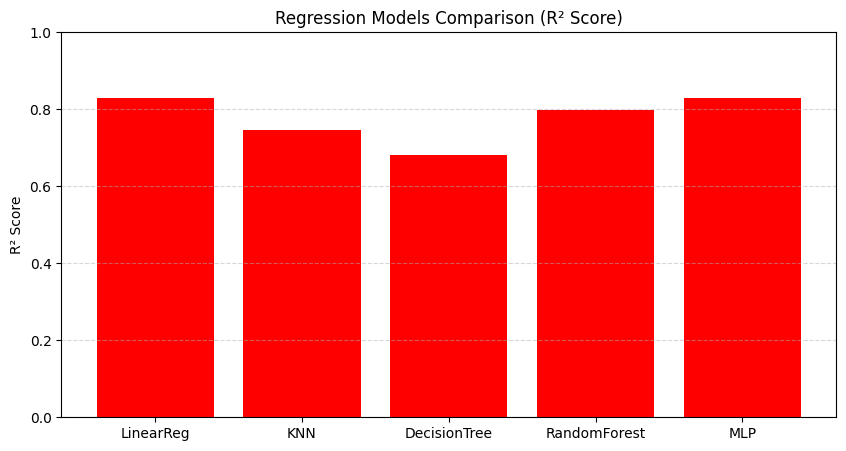

In [46]:
# Regression

reg_models = ['LinearReg', 'KNN', 'DecisionTree', 'RandomForest', 'MLP']
reg_scores = [lin_r2, knn_r2, dt_r2, rf_r2, mlp_r2]

plt.figure(figsize=(10,5))
plt.bar(reg_models, reg_scores, color='red')
plt.title("Regression Models Comparison (R² Score)")
plt.ylabel("R² Score")
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

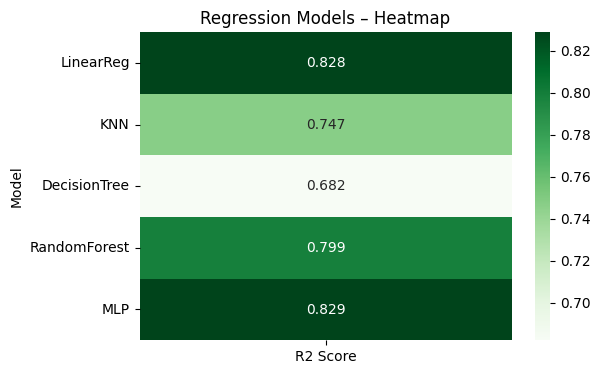

In [51]:
reg_labels = ['LinearReg', 'KNN', 'DecisionTree', 'RandomForest', 'MLP']
reg_scores = [lin_r2, knn_r2, dt_r2, rf_r2, mlp_r2]

df_reg = pd.DataFrame({
    'Model': reg_labels,
    'R2 Score': [lin_r2, knn_r2, dt_r2, rf_r2, mlp_r2]
})

plt.figure(figsize=(6,4))
sns.heatmap(df_reg.set_index('Model'), annot=True, cmap='Greens', fmt=".3f")
plt.title("Regression Models – Heatmap")
plt.show()

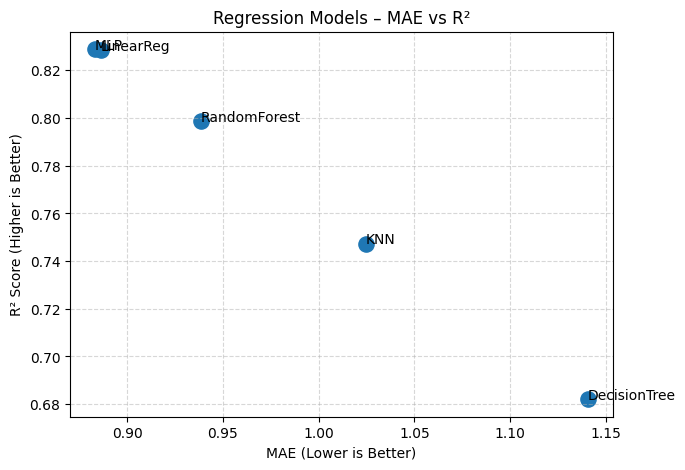

In [54]:
reg_mae = [lin_mae, knn_mae, dt_mae, rf_mae, mlp_mae]

plt.figure(figsize=(7,5))
plt.scatter(reg_mae, [lin_r2, knn_r2, dt_r2, rf_r2, mlp_r2], s=120)

for i, label in enumerate(reg_labels):
    plt.annotate(label, (reg_mae[i], reg_scores[i]))

plt.xlabel("MAE (Lower is Better)")
plt.ylabel("R² Score (Higher is Better)")
plt.title("Regression Models – MAE vs R²")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

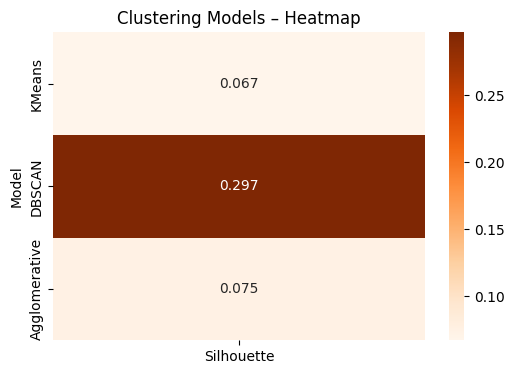

In [52]:
# Clustering

cluster_labels = ['KMeans', 'DBSCAN', 'Agglomerative']
cluster_scores = [sil_k6, sil_dbscan, sil_agg]

df_cluster = pd.DataFrame({
    'Model': cluster_labels,
    'Silhouette': cluster_scores
})

plt.figure(figsize=(6,4))
sns.heatmap(df_cluster.set_index('Model'), annot=True, cmap='Oranges', fmt=".3f")
plt.title("Clustering Models – Heatmap")
plt.show()

## Pooria Jafari
### https://www.linkedin.com/in/pooria-jafari/